In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

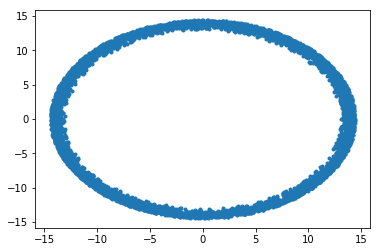

In [8]:
N = 5000#Numero de puntos



rad = 15 #Radio

#Generar anillo
theta = np.random.uniform(0.0, 2.0*np.pi, N)
r = (rad-2)+ np.sqrt(np.random.uniform(0, 2, N))
x_a =  r * np.cos(theta)
y_a = r * np.sin(theta)


plt.plot(x_a,y_a,'.')

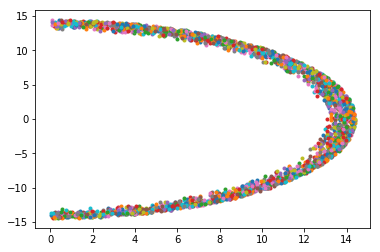

In [9]:
for i in range (N):
    if np.any(x_a[i] >= 0):
        plt.plot(x_a[i],y_a[i],'.')

In [10]:
def distancia(x_0,x_1,y_0,y_1):
    d = np.sqrt((x_1 - x_0)**2 + (y_1-y_0)**2)
    return d
#contador
dis_mDD= [] #Distancia entre los datos x<0
disM_DD = [] #Distancia entre los datos x>0
dis_RR =[] #RR
dis_DR = []     #DR

In [11]:

w_may=2  #Peso mayor para x>0
w_men=1  #Peso menor para x<0

In [12]:
for i in range(N):
    for j in range(i+1,N):
        if np.any(x_a[i] >= 0):
            d_d =w_may* distancia(x_a[i],x_a[j],y_a[i],y_a[j])
            dis_mDD.append(d_d)
        else:
            d_d = w_men*distancia(x_a[i],x_a[j],y_a[i],y_a[j])
            disM_DD.append(d_d)

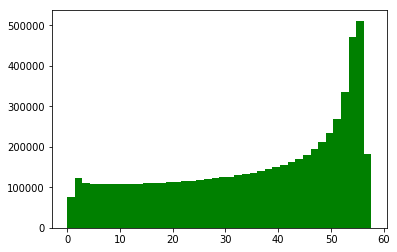

In [13]:
DDm, DD_mbin, m = plt.hist(dis_mDD,bins=40,color='green')

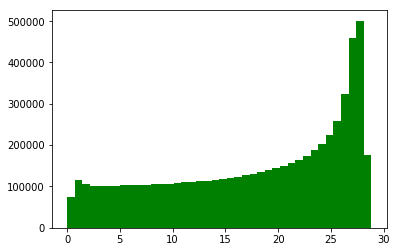

In [14]:
DDM, DD_Mbin, o = plt.hist(disM_DD,bins=40,color='green')

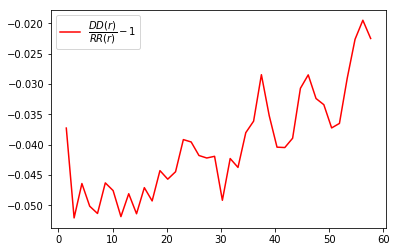

In [15]:
plt.plot(DD_mbin[1:],(DDM/DDm) -1, label=('$\dfrac{DD(r)}{RR(r)}-1$'),color='red')
plt.legend()

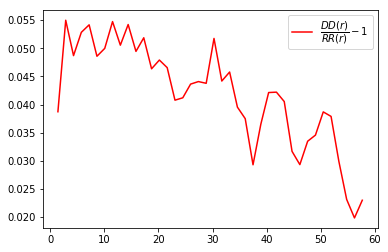

In [16]:
plt.plot(DD_mbin[1:],(DDm/DDM) -1, label=('$\dfrac{DD(r)}{RR(r)}-1$'),color='red')
plt.legend()

# Anillo con numero de datos a cada lado 

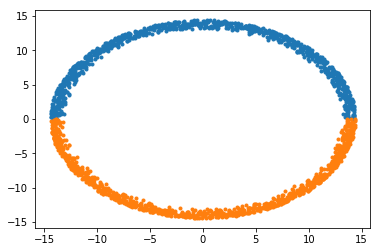

In [17]:
N = 1000#Numero de puntos



rad = 15 #Diametro

#Generar anillo superior
theta = np.random.uniform(0.0, 1.0*np.pi, N)
r = (rad-2)+ np.sqrt(np.random.uniform(0, 2, N))
x_a =  r * np.cos(theta)
y_a = r * np.sin(theta)

#Generar anillo inferior
theta = np.random.uniform(1.0*np.pi, 2.0*np.pi, N)
r = (rad-2)+ np.sqrt(np.random.uniform(0, 2, N))
a_x =  r * np.cos(theta)
a_y = r * np.sin(theta)

plt.plot(x_a,y_a,'.')
plt.plot(a_x,a_y,'.')

Distancia entre el mismo tipo de puntos

In [18]:
#Contador
disA_DD = [] #DD Distancia entre los puntos de arriba
disB_DD = [] #DD Distancia entre los puntos de abajo
disAB_DD = [] #DD Distancia entre los puntos de abajo y arriba

In [19]:
w_may=2  #Peso mayor para y>0
w_men=1  #Peso menor para y<0

In [20]:
for i in range(N):
    for j in range(i+1,N):
        dD_ddA = distancia(x_a[i],x_a[j],y_a[i],y_a[j])
        dD_ddB = distancia(a_x[i],a_x[j],a_y[i],a_y[j])
        disA_DD.append(dD_ddA)
        disB_DD.append(dD_ddB)

Distancia entre los puntos de arriba y los de abajo

In [21]:
for i in range (N):
    for j in range (N):
        dD_ddAB = distancia(x_a[i],a_x[j],y_a[i],a_y[j])
        disAB_DD.append(dD_ddAB)

Histogramas (Nota: el pesos, lo use en esta parte (para seNalar que hay mas objetos de los que se observan ))

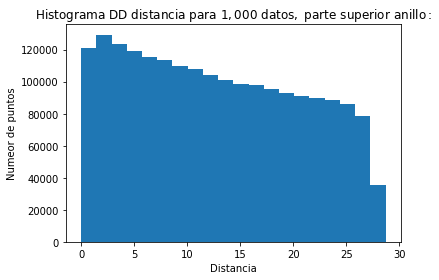

In [22]:
DD,datoA_bin,a = plt.hist((w_may*w_may)*(disA_DD),bins=20)   #DDD,datoD_bin,n = plt.hist((disD_DD),bins=40)
plt.xlabel('Distancia')
plt.ylabel('Numeor de puntos')
plt.title('$\mathrm{Histograma\ DD\  distancia\ para\ 1,000\ datos,\ parte\ superior\ anillo:}$')
plt.show()

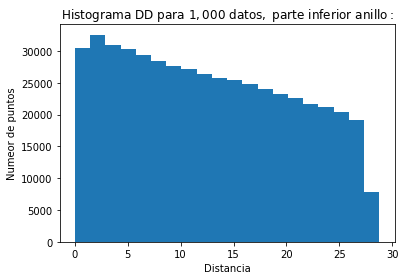

In [23]:
RR,datoB_bin,b = plt.hist((w_men*w_men)*(disB_DD),bins=20) 
plt.xlabel('Distancia')
plt.ylabel('Numeor de puntos')
plt.title('$\mathrm{Histograma\  DD\ para\ 1,000\ datos,\ parte\ inferior\ anillo:}$')
plt.show()

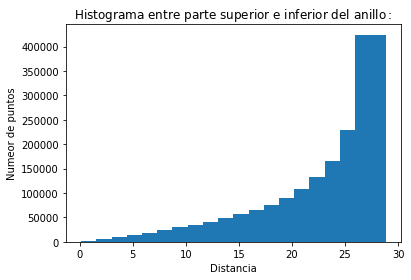

In [24]:
       
DR,datoAB_bin,ab = plt.hist((w_men*w_may)*(disAB_DD),bins=20)    
plt.xlabel('Distancia')
plt.ylabel('Numeor de puntos')
plt.title('$\mathrm{Histograma\   entre\ parte\ superior\ e\ inferior\ del\ anillo:}$')
plt.show()

Funciones de correlacion 

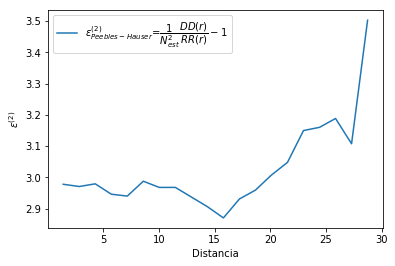

In [25]:
Nest= 1
plt.plot(datoA_bin[1:],Nest*(DD/RR) -1, label=('$\epsilon^{(2)}_{Peebles-Hauser}$=$\dfrac{1}{N_{est}^{2}}\dfrac{DD(r)}{RR(r)}-1$'))
plt.xlabel('Distancia')
plt.ylabel('$\epsilon^{(2)}$')
plt.legend()

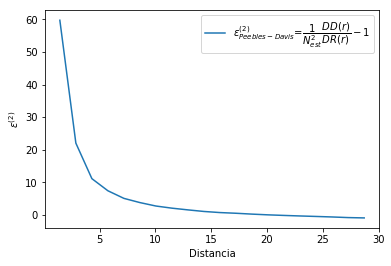

In [29]:
plt.plot(datoA_bin[1:],Nest*(DD/DR) -1, label=('$\epsilon^{(2)}_{Peebles-Davis}$=$\dfrac{1}{N_{est}^{2}}\dfrac{DD(r)}{DR(r)}-1$'))
plt.xlabel('Distancia')
plt.ylabel('$\epsilon^{(2)}$')
plt.legend()

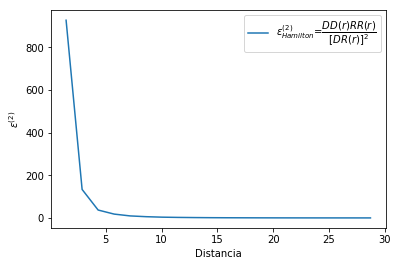

In [30]:
plt.plot(datoA_bin[1:],((DD*RR)/(DR)**2), label=('$\epsilon^{(2)}_{Hamilton}$=$\dfrac{DD(r)RR(r)}{[DR(r)]^2}$'))
plt.xlabel('Distancia')
plt.ylabel('$\epsilon^{(2)}$')
plt.legend()

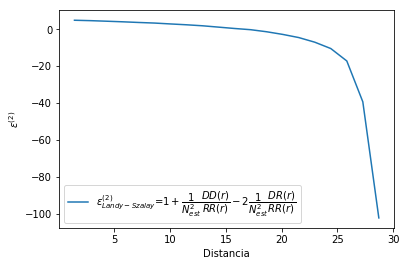

In [31]:
plt.plot(datoA_bin[1:],(1+Nest*(DD/RR) - 2*Nest*(DR/RR)), label=('$\epsilon^{(2)}_{Landy-Szalay}$=$1+\dfrac{1}{N_{est}^{2}}\dfrac{DD(r)}{RR(r)}-2\dfrac{1}{N_{est}^{2}}\dfrac{DR(r)}{RR(r)}$'))
plt.xlabel('Distancia')
plt.ylabel('$\epsilon^{(2)}$')
plt.legend()

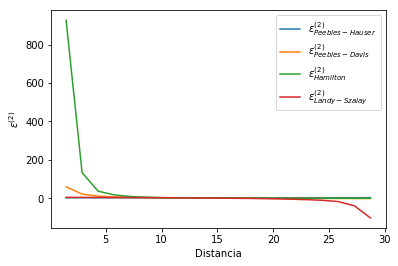

In [32]:
plt.plot(datoA_bin[1:],Nest*(DD/RR) -1, label=('$\epsilon^{(2)}_{Peebles-Hauser}$'))
plt.plot(datoA_bin[1:],Nest*(DD/DR) -1, label=('$\epsilon^{(2)}_{Peebles-Davis}$'))
plt.plot(datoA_bin[1:],((DD*RR)/(DR)**2), label=('$\epsilon^{(2)}_{Hamilton}$'))
plt.plot(datoA_bin[1:],(1+Nest*(DD/RR) - 2*Nest*(DR/RR)), label=('$\epsilon^{(2)}_{Landy-Szalay}$'))
plt.xlabel('Distancia')
plt.ylabel('$\epsilon^{(2)}$')
plt.legend()

# AnilloGrandeConAnilloPequeNo

Generamos los dos anillos

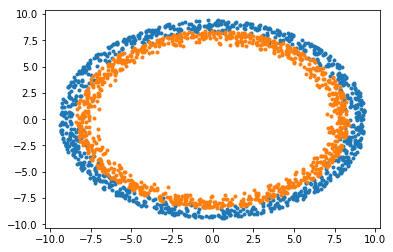

In [101]:
N = 1000#Numero de puntos

rad = 10 #Diametro

#Generar anillo superior
theta = np.random.uniform(0.0, 2.0*np.pi, N)
r = (rad-2)+ np.sqrt(np.random.uniform(0, 2, N))
x_a =  r * np.cos(theta)
y_a = r * np.sin(theta)

#Generar anillo inferior
theta = np.random.uniform(0.0*np.pi, 2.0*np.pi, N)
r = (rad-3)+ np.sqrt(np.random.uniform(0, 2, N))
a_x =  r * np.cos(theta)
a_y = r * np.sin(theta)

plt.plot(x_a,y_a,'.')
plt.plot(a_x,a_y,'.')

Para las distancia entre puntos

In [103]:
#Contador
disA_DD = [] #DD Distancia entre los puntos del anillo mayor
disB_DD = [] #DD Distancia entre los puntos del anillo menor
disAB_DD = [] #DD Distancia entre los puntos del anillo superior e inferior

In [104]:
w_may=1  #Peso anillo mayor 
w_men=2  #Peso anillo menor 

Distancia entre puntos del mismo peso

In [105]:
for i in range(N):
    for j in range(i+1,N):
        dD_ddA = distancia(x_a[i],x_a[j],y_a[i],y_a[j])
        dD_ddB = distancia(a_x[i],a_x[j],a_y[i],a_y[j])
        disA_DD.append(dD_ddA)
        disB_DD.append(dD_ddB)

Dsitancia entre puntos de distinto peso

In [106]:
for i in range (N):
    for j in range (N):
        dD_ddAB = distancia(x_a[i],a_x[j],y_a[i],a_y[j])
        disAB_DD.append(dD_ddAB)

Histogramas 

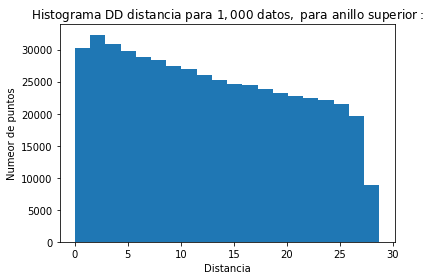

In [35]:
DD,datoA_bin,a = plt.hist((w_men*w_men)*(disA_DD),bins=20)   
plt.xlabel('Distancia')
plt.ylabel('Numeor de puntos')
plt.title('$\mathrm{Histograma\ DD\  distancia\ para\ 1,000\ datos,\ para\ anillo\ superior:}$')
plt.show()

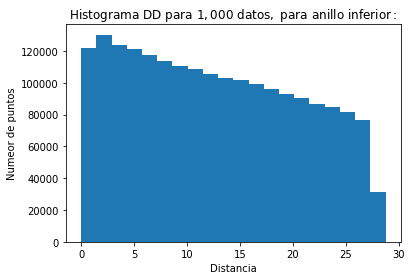

In [37]:
RR,datoB_bin,b = plt.hist((w_may*w_may)*(disB_DD),bins=20) 
plt.xlabel('Distancia')
plt.ylabel('Numeor de puntos')
plt.title('$\mathrm{Histograma\  DD\ para\ 1,000\ datos,\ para\ anillo\ inferior:}$')
plt.show()

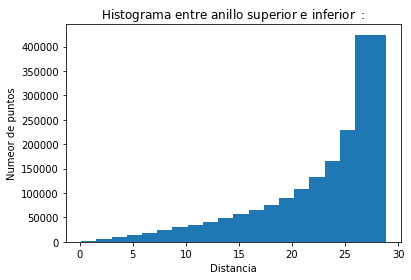

In [38]:
DR,datoAB_bin,ab = plt.hist((w_men*w_may)*(disAB_DD),bins=20)    
plt.xlabel('Distancia')
plt.ylabel('Numeor de puntos')
plt.title('$\mathrm{Histograma\   entre\ anillo\ superior\ e\ inferior\ :}$')
plt.show()

Funciones de correlacion

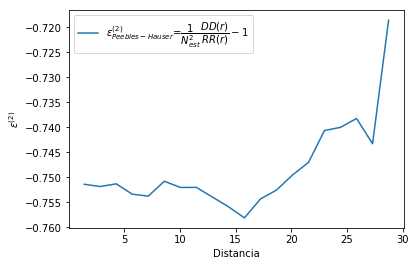

In [44]:
Nest= 1
plt.plot(datoA_bin[1:],Nest*(DD/RR) -1, label=('$\epsilon^{(2)}_{Peebles-Hauser}$=$\dfrac{1}{N_{est}^{2}}\dfrac{DD(r)}{RR(r)}-1$'))
plt.xlabel('Distancia')
plt.ylabel('$\epsilon^{(2)}$')
plt.legend()

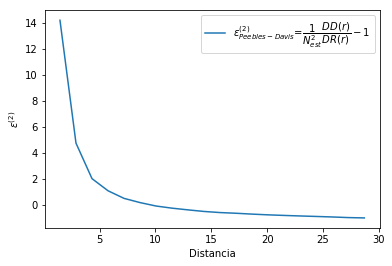

In [45]:
plt.plot(datoA_bin[1:],Nest*(DD/DR) -1, label=('$\epsilon^{(2)}_{Peebles-Davis}$=$\dfrac{1}{N_{est}^{2}}\dfrac{DD(r)}{DR(r)}-1$'))
plt.xlabel('Distancia')
plt.ylabel('$\epsilon^{(2)}$')
plt.legend()

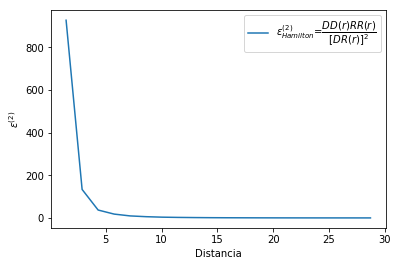

In [46]:
plt.plot(datoA_bin[1:],((DD*RR)/(DR)**2), label=('$\epsilon^{(2)}_{Hamilton}$=$\dfrac{DD(r)RR(r)}{[DR(r)]^2}$'))
plt.xlabel('Distancia')
plt.ylabel('$\epsilon^{(2)}$')
plt.legend()

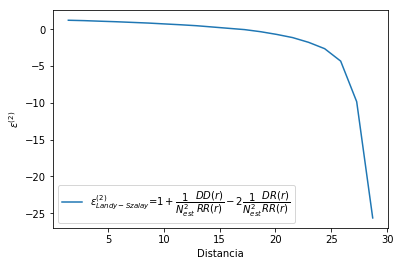

In [47]:
plt.plot(datoA_bin[1:],(1+Nest*(DD/RR) - 2*Nest*(DR/RR)), label=('$\epsilon^{(2)}_{Landy-Szalay}$=$1+\dfrac{1}{N_{est}^{2}}\dfrac{DD(r)}{RR(r)}-2\dfrac{1}{N_{est}^{2}}\dfrac{DR(r)}{RR(r)}$'))
plt.xlabel('Distancia')
plt.ylabel('$\epsilon^{(2)}$')
plt.legend()

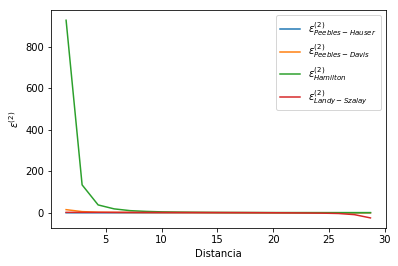

In [48]:
plt.plot(datoA_bin[1:],Nest*(DD/RR) -1, label=('$\epsilon^{(2)}_{Peebles-Hauser}$'))
plt.plot(datoA_bin[1:],Nest*(DD/DR) -1, label=('$\epsilon^{(2)}_{Peebles-Davis}$'))
plt.plot(datoA_bin[1:],((DD*RR)/(DR)**2), label=('$\epsilon^{(2)}_{Hamilton}$'))
plt.plot(datoA_bin[1:],(1+Nest*(DD/RR) - 2*Nest*(DR/RR)), label=('$\epsilon^{(2)}_{Landy-Szalay}$'))
plt.xlabel('Distancia')
plt.ylabel('$\epsilon^{(2)}$')
plt.legend()